In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [2]:
data=pd.read_csv("C:/Users/Rohit/Desktop/DS Assignments/Clustering/crime_data.csv")

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
DATA=data.rename({"Unnamed: 0" : "Name"},axis=1)

In [5]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime=DATA.drop(["Name"],axis=1)

In [7]:
array=crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [8]:
Scaler=StandardScaler().fit(array)
X=Scaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

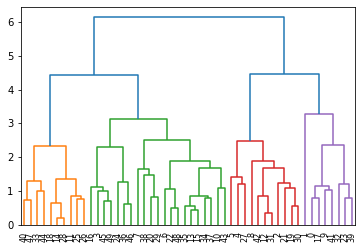

In [9]:
dendrogram=sch.dendrogram(sch.linkage(X, method='complete'))

In [10]:
HC=AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage ='complete')

In [11]:
HC

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [12]:
y_hc=HC.fit_predict(X)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])


In [13]:
Clusters

,Clusters
0,1
1,4
2,2
3,0
4,2
5,2
6,0
7,0
8,2
9,1


C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


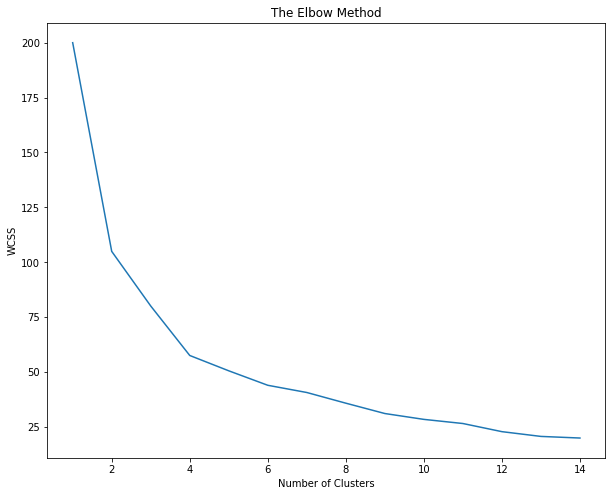

In [14]:
plt.figure(figsize=(10,8))
wcss = []
for i in range(1,15):
    kmeans=KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)   
plt.plot(range(1,15),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans= KMeans(n_clusters=4)
y_kmeans= kmeans.fit_predict(X)

In [16]:
y_kmeans

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

In [17]:
y_kmeans1=y_kmeans+1
cluster= list(y_kmeans1)

In [18]:
DATA['cluster']=cluster

In [19]:
kmeans_mean_cluster=pd.DataFrame(round(DATA.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,13.9,243.6,53.8,21.4
2,3.6,78.5,52.1,12.2
3,10.8,257.4,76.0,33.2
4,5.7,138.9,73.9,18.8


In [20]:
stats = DATA.sort_values("Rape",ascending=True)
total=pd.DataFrame(stats)

In [21]:
total

,Name,Murder,Assault,UrbanPop,Rape,cluster
33,North Dakota,0.8,45,44,7.3,2
18,Maine,2.1,83,51,7.8,2
38,Rhode Island,3.4,174,87,8.3,4
47,West Virginia,5.7,81,39,9.3,2
28,New Hampshire,2.1,57,56,9.5,2
48,Wisconsin,2.6,53,66,10.8,2
6,Connecticut,3.3,110,77,11.1,4
44,Vermont,2.2,48,32,11.2,2
14,Iowa,2.2,56,57,11.3,2
40,South Dakota,3.8,86,45,12.8,2
